<a href="https://colab.research.google.com/github/AmithReddyKasarla/AmithReddy_INFO5502_-Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [169]:
### You code here
#Importing pyforest as this is an automated library with all the basic libraries installed
!pip install pyforest
import pyforest


In [170]:
#Reading the data
df = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/portfolio_data.csv')

<IPython.core.display.Javascript object>

In [171]:
#Displaying the data
df

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [172]:
#Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [173]:
#Checking for null values
df.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

**MULTI VARIATE REGRESSION**

In [174]:
#This is a Multi Variate Regression problem.
#Here, i am taking Amazon as my dependent variable and will predict the stock prices with the help of other stock prices like DPZ,BTC,NFLX 
df['AMZN']

0        248.229996
1        252.550003
2        258.049988
3        255.720001
4        257.730011
           ...     
1515    1917.770020
1516    1899.869995
1517    1889.979980
1518    1822.680054
1519    1840.119995
Name: AMZN, Length: 1520, dtype: float64

In [175]:
type(df['AMZN'])

pandas.core.series.Series

In [176]:
#Now i am dividing the data into dependent and independent using iloc
x = df.iloc[:,[2,3,4]]
x

,DPZ,BTC,NFLX
0,51.190983,106.250000,30.415714
1,51.987320,98.099998,30.641428
2,52.446388,112.900002,30.492857
3,53.205257,109.599998,30.098572
4,54.151505,113.199997,29.464285
...,...,...,...
1515,283.149994,6171.959961,364.369995
1516,282.160004,6358.290039,362.750000
1517,278.369995,7191.359863,361.040009
1518,273.880005,7980.129883,345.260010


In [177]:
y = df.iloc[:,1]
y

0        248.229996
1        252.550003
2        258.049988
3        255.720001
4        257.730011
           ...     
1515    1917.770020
1516    1899.869995
1517    1889.979980
1518    1822.680054
1519    1840.119995
Name: AMZN, Length: 1520, dtype: float64

In [178]:
#Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 5)

<IPython.core.display.Javascript object>

In [179]:
#Importing the LinearRegression model
from sklearn.linear_model import LinearRegression   

In [180]:
mod = LinearRegression()

In [181]:
#Fitting the model
mod.fit(x_train,y_train)

LinearRegression()

In [182]:
#Predicting the model
pr = mod.predict(x_test)
pr

array([ 598.26992798, 1024.3902803 ,  368.5053749 ,  312.98544322,
       1192.84331114,  573.31298975,  568.65961411,  861.2701905 ,
        684.61085573,  545.69003943, 1936.43333919, 1872.70566236,
       1854.16269726,  429.65950041,  520.85888309, 1381.4987064 ,
        859.66392063, 1279.74128265,  393.97861259,  302.70554296,
       1467.36007478, 1693.84781736, 1033.5145128 ,  439.53946228,
        344.86968048, 1087.26658547, 1475.09014358,  661.37467362,
        250.72328341,  456.57063953, 1562.26843612, 1698.41881745,
       1435.89469869,  365.93883623, 1679.28232235,  814.41191849,
       1890.03335704, 1048.82635529,  622.38214763,  662.45190428,
        368.26752409,  504.73863347,  672.0500439 , 1099.16610722,
       1731.69197362,  324.8817285 ,  870.96385601,  913.57759955,
        686.4992241 , 1765.81589317, 1520.46614022, 1023.51135176,
       1054.72035362,  565.84604634,  525.86688437, 1473.97788073,
        230.52511174,  786.24625321, 1097.86318945,  610.86759

In [183]:
#import the metrics
from sklearn.metrics import r2_score

In [184]:
#Importing regressionSummary to display all the error values
!pip install dmba
from dmba import regressionSummary

In [185]:
#Model Accuracy
acc = r2_score(y_test,pr)
acc

0.9807140305136463

In [186]:
#Error Values
regressionSummary(y_test,mod.predict(x_test))


Regression statistics

                      Mean Error (ME) : 2.8490
       Root Mean Squared Error (RMSE) : 71.3534
            Mean Absolute Error (MAE) : 59.6702
          Mean Percentage Error (MPE) : -0.5633
Mean Absolute Percentage Error (MAPE) : 9.6050


**TIME SERIES USING LSTM**

In [187]:
#Importing the required libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM


In [188]:
df['Date'] = pd.to_datetime(df['Date'])

<IPython.core.display.Javascript object>

In [189]:
#Setting Date as index
df.set_index(df['Date'])

,Date,AMZN,DPZ,BTC,NFLX
Date,,,,,
2013-05-01,2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,2013-05-07,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
2019-05-08,2019-05-08,1917.770020,283.149994,6171.959961,364.369995
2019-05-09,2019-05-09,1899.869995,282.160004,6358.290039,362.750000
2019-05-10,2019-05-10,1889.979980,278.369995,7191.359863,361.040009


In [190]:
from datetime import datetime
%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

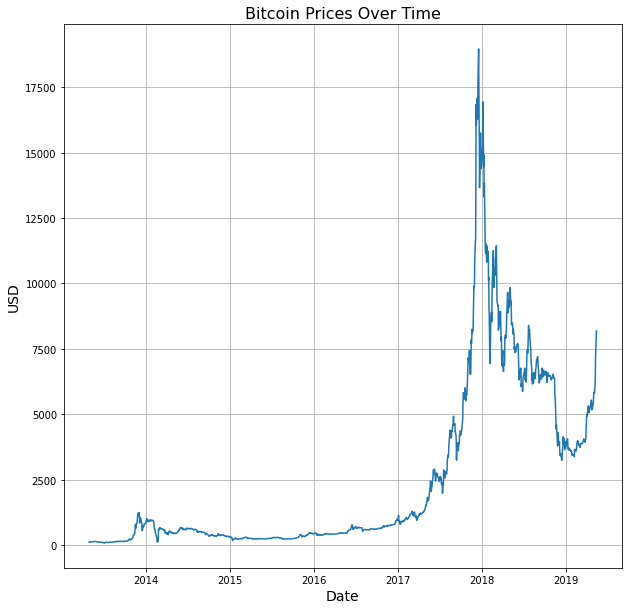

In [191]:
#Plotting the BTC Price trend line over the years 
plt.figure(figsize=(10,10))
plt.title('Bitcoin Prices Over Time',fontsize=16)
plt.plot(df.Date,df.BTC)
#plt.plot(df.iloc[:,0],df.iloc[:,1:])
plt.xlabel('Date',fontsize=14)
plt.ylabel('USD',fontsize=14)
plt.grid()
plt.show()

In [192]:
#Thaking the BTC values
BTCStockValues=df['BTC'].values
print(BTCStockValues)

[ 106.25       98.099998  112.900002 ... 7191.359863 7980.129883
 8183.830078]


In [193]:
#Scaling the values and reshaping them
sc=MinMaxScaler(feature_range=(0,1))
BTCStockValuesScaledData=sc.fit_transform(BTCStockValues.reshape(-1, 1))
BTCStockValuesScaledData

array([[0.00193571],
       [0.00150455],
       [0.00228751],
       ...,
       [0.37675649],
       [0.41848448],
       [0.42926075]])

In [194]:
#Traing the the data
trainSize=int(len(BTCStockValuesScaledData)*0.8)
testSize=len(BTCStockValuesScaledData)-trainSize
trainData=BTCStockValuesScaledData[0:trainSize,:]
testData=BTCStockValuesScaledData[trainSize:,:]


In [195]:
def convertMatrix(dataset, step=1):
  X=[]
  Y=[]
  for i in range(len(dataset)-step-1):
	  X.append(dataset[i:(i+step), 0])
	  Y.append(dataset[i + step, 0])
  return np.array(X), np.array(Y)

x_train, y_train = convertMatrix(trainData)
x_test, y_test = convertMatrix(testData)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape)
print(x_test.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1214, 1, 1)
(302, 1, 1)


In [197]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [198]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1214/1214 - 11s - loss: 0.0040 - 11s/epoch - 9ms/step
Epoch 2/5
1214/1214 - 5s - loss: 4.6270e-04 - 5s/epoch - 4ms/step
Epoch 3/5
1214/1214 - 5s - loss: 6.7174e-04 - 5s/epoch - 4ms/step
Epoch 4/5
1214/1214 - 4s - loss: 4.6639e-04 - 4s/epoch - 3ms/step
Epoch 5/5
1214/1214 - 3s - loss: 5.4469e-04 - 3s/epoch - 2ms/step


In [199]:
trainX = model.predict(x_train)
testX = model.predict(x_test)

In [200]:
trainPredict = sc.inverse_transform(trainX)
testPredict = sc.inverse_transform(testX)

In [201]:
trainY = sc.inverse_transform([y_train])
testY = sc.inverse_transform([y_test]) 

In [202]:
#Displaying the RMSE values
trainScore = np.sqrt(np.mean(trainY-trainPredict)**2)
print('RMSE' , trainScore)
testScore = np.sqrt(np.mean(testY-testPredict)**2)
print('RMSE' , testScore)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE 22.436429840973496


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE 115.90111085699509


In [203]:
trainPlot = np.empty_like(BTCStockValuesScaledData)
testPlot = np.empty_like(BTCStockValuesScaledData)
trainPlot[:, :] = np.nan
testPlot[:, :] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
trainPlot[1:len(trainPredict)+1, :] = trainPredict
testPlot[len(trainPredict)+(1*2)+1:len(BTCStockValuesScaledData)-1, :] = testPredict

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

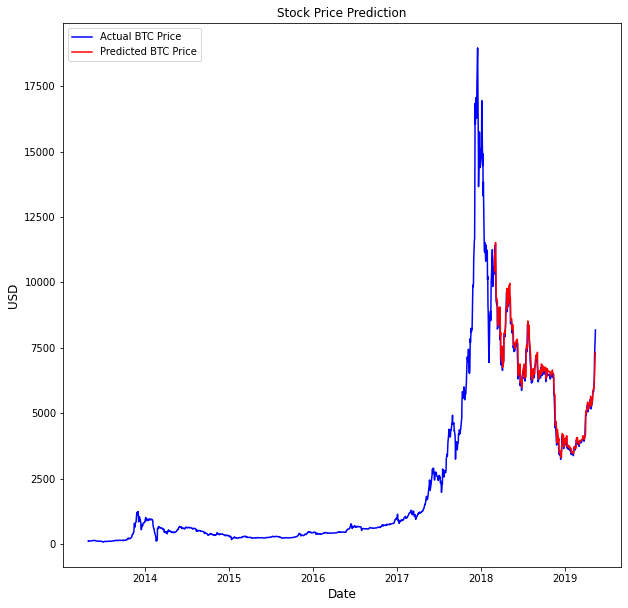

In [205]:
#Plotting the final graph
plt.figure(figsize=(10,10))
plt.title('Stock Price Prediction',fontsize=12)
plt.plot(df.Date,sc.inverse_transform(BTCStockValuesScaledData),color = 'blue')
#plt.plot(df.Date,trainPlot)
plt.plot(df.Date,testPlot,color = 'red')
plt.legend(['Actual BTC Price','Predicted BTC Price'],loc='upper left')
#plt.legend(['Actual','Train Predictions','Test Predictions'],loc='lower right')
plt.xlabel('Date',fontsize=12)
plt.ylabel('USD',fontsize=12)
plt.show()

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [206]:
### You code here:
import pyforest

In [207]:
#Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/AmithReddyKasarla/AmithReddy_INFO5502_-Spring2022/main/twitter_train.csv")

<IPython.core.display.Javascript object>

In [208]:
#Displaying the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [209]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [210]:
#Checking for null values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [211]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [212]:
#Dropping the unwanted columns
df.drop(columns=['id'],inplace = True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [214]:
#Checking the cout of tweets
df['tweet'].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                      319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets         82
aww yeah it's all good bing bong bing bong                                                                 75
i'm so   and #grateful now that - #affirmations                                                            56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                       40
                                                                                                         ... 
family time #you?   #move #bodyandsoul                                                                      1
nobody clicked the tag to see what was going on, it was  . lol                                              1
the scientific facts of happiness you never knew  #healthy   #mind                                          1
 @user #be

In [215]:
#Checking label counts
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


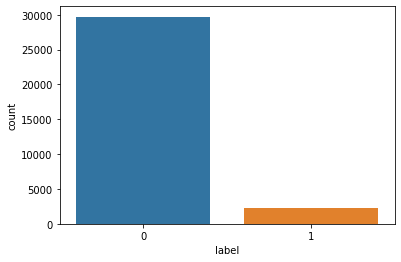

In [216]:
#Displaying the labels count
sns.countplot(df['label'])

In [217]:
df['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [218]:
#Cleaning the tweet by removing the unwanted charaters and other outliers
import re
import string
def text_cleaning(text):
  text = text.lower()
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  text = re.sub(r"dysfunctional", "disfunctional ", text)
  text = re.sub(r"dysfunctional", "disfunctional ", text)
  text = re.sub(r"can t", "can not ", text)
  text = re.sub(r"don t", "do not ", text)
  text = re.sub(r"getthanked", "get thanked ", text)
  #text = re.sub(r"cause", "cause ", text)
  text = re.sub(r"youuu", "you ", text)
  text = re.sub(r"isz", "is ", text)
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "can not ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub('\W', ' ', text)
  text = re.sub('\s+', ' ', text)
  text = text.strip(' ')
  return text

df['tweet'] = df['tweet'].map(lambda x: text_cleaning(x))
df['tweet'] = df['tweet'].map(lambda x: text_cleaning(x))
df['tweet'][1]

'user user thanks for lyft credit i can not use cause they do not offer wheelchair vans in pdx disapointed get thanked'

In [219]:
#visulaizing words
words = " ".join(sent for sent in df['tweet'])

from wordcloud import WordCloud
cld = WordCloud(width = 200, height = 190).generate(words)

plt.figure(figsize=(12,10))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x720 with 0 Axes>

In [220]:
df

,label,tweet
0,0,user when a father is disfunctional and is so ...
1,0,user user thanks for lyft credit i can not use...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation
...,...,...
31957,0,ate user is that you
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,user sikh temple vandalised in in calgary wso ...


In [221]:
#Defining the dependent variable- label
y=df['label']

In [222]:
#Impoting countvector to transform the text format into a array
from sklearn.feature_extraction.text import CountVectorizer
z = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
x = z.fit_transform(df['tweet'])

In [223]:
x

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 131947 stored elements in Compressed Sparse Row format>

In [224]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [225]:
#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 5)

<IPython.core.display.Javascript object>

In [226]:
#Importing the required Model
from sklearn.linear_model import LogisticRegression

In [227]:
mod = LogisticRegression()

In [228]:
#Fitting the model
mod.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [229]:
#Predicting the values
pr = mod.predict(x_test)
pr

array([0, 0, 0, ..., 0, 0, 0])

In [230]:
#Importing the metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix

In [231]:
#Training Model accuracy 
mod.score(x_train,y_train)

0.9530290586256795

In [232]:
#Testing model accuracy
mod.score(x_test,y_test)

0.9438448302831222

In [233]:
#confusion Matrix
cm = confusion_matrix(y_test,pr)
cm

array([[5892,   43],
       [ 316,  142]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

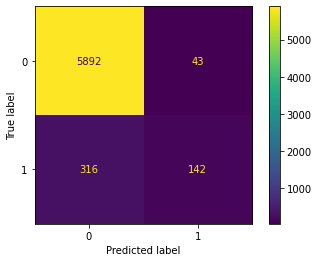

In [234]:
plot_confusion_matrix(mod,x_test,y_test)
plt.show()

In [235]:
#Classification Report
print(classification_report(y_test,mod.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5935
           1       0.77      0.31      0.44       458

    accuracy                           0.94      6393
   macro avg       0.86      0.65      0.71      6393
weighted avg       0.94      0.94      0.93      6393

